In [1]:
# # Mount our Google Drive
# from google.colab import drive

# drive.mount('/content/drive')

In [2]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../../data/movie-data-csv/netflix-tv.csv")
df.head(2).T

,0,1
id,ts300399,tm84618
title,Five Came Back: The Reference Films,Taxi Driver
type,SHOW,MOVIE
plot,This collection includes 12 World War II-era p...,A mentally unstable Vietnam War veteran works ...
release_year,1945,1976
age_certification,TV-MA,R
runtime,51,114
genres,['documentation'],"['drama', 'crime']"
production_countries,['US'],['US']
seasons,1.0,NaN


### Data Understanding

In [4]:
df.columns

Index(['id', 'title', 'type', 'plot', 'release_year', 'age_certification',
       'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id',
       'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [5]:
df.shape

(5580, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5580 non-null   object 
 1   title                 5580 non-null   object 
 2   type                  5580 non-null   object 
 3   plot                  5580 non-null   object 
 4   release_year          5580 non-null   int64  
 5   age_certification     3064 non-null   object 
 6   runtime               5580 non-null   int64  
 7   genres                5580 non-null   object 
 8   production_countries  5580 non-null   object 
 9   seasons               2004 non-null   float64
 10  imdb_id               5208 non-null   object 
 11  imdb_score            5136 non-null   float64
 12  imdb_votes            5121 non-null   float64
 13  tmdb_popularity       5498 non-null   float64
 14  tmdb_score            5294 non-null   float64
dtypes: float64(5), int64(

In [7]:
missing_info = df.isnull().sum().to_frame(name='Null Count')
missing_info['Null Percentage (%)'] = (df.isnull().mean() * 100).round(2)
missing_info = missing_info.sort_values(by='Null Count', ascending=False)
missing_info

,Null Count,Null Percentage (%)
seasons,3576,64.09
age_certification,2516,45.09
imdb_votes,459,8.23
imdb_score,444,7.96
imdb_id,372,6.67
tmdb_score,286,5.13
tmdb_popularity,82,1.47
runtime,0,0.00
release_year,0,0.00
plot,0,0.00


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5580.0,2016.602688,6.742813,1945.000000,2016.00000,2018.0000,2020.000,2022.000
runtime,5580.0,76.733513,38.467858,0.000000,44.00000,83.0000,104.000,240.000
seasons,2004.0,2.051397,2.346613,1.000000,1.00000,1.0000,2.000,39.000
imdb_score,5136.0,6.510066,1.163322,1.500000,5.80000,6.6000,7.300,9.600
imdb_votes,5121.0,23002.661004,95451.580211,5.000000,512.00000,2207.0000,9082.000,2294231.000
tmdb_popularity,5498.0,22.684297,81.884492,0.009442,2.73625,6.8215,16.669,2274.044
tmdb_score,5294.0,6.830376,1.167290,1.000000,6.10000,6.9000,7.600,10.000


In [9]:
import ast

# Parsing string representations of lists (like "[comedy, drama]") into actual Python list objects (['comedy', 'drama'])
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Check the maximum and minimum length of plot description

In [10]:
# Calculate the length of each description
description_lengths = df['plot'].str.len()

max_length = description_lengths.max()
min_length = description_lengths.min()

print(f"Maximum plot length: {max_length}")
print(f"Minimum plot length: {min_length}")

Maximum plot length: 1731
Minimum plot length: 11


Check the maximum and minimum number of genres a particular movie has

In [11]:
# Calculate the number of genres for each movie
genre_counts = df['genres'].apply(len)

# Find the max and min number of genres
max_genres = genre_counts.max()
min_genres = genre_counts.min()

print(f"Maximum number of genres for a movie: {max_genres}")
print(f"Minimum number of genres for a movie: {min_genres}")

Maximum number of genres for a movie: 10
Minimum number of genres for a movie: 0


Maximum and minimum movie released year

In [12]:
latest_movie_year = df['release_year'].max()
oldest_movie_year = df['release_year'].min()

print(f"Latest oldest year of a movie : {latest_movie_year}")
print(f"Oldest realease year a movie: {oldest_movie_year}")

Latest oldest year of a movie : 2022
Oldest realease year a movie: 1945


### Exploratory Data Analysis

Type count

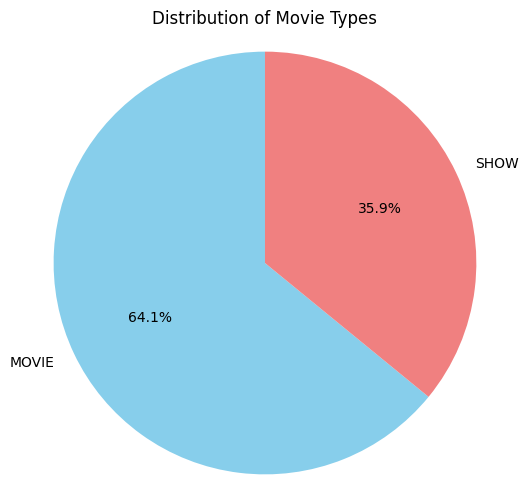

In [13]:
# Get value counts
type_counts = df['type'].value_counts()
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Movie Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

Check distribution of each individual genres



In [14]:
from collections import Counter

all_genres = df['genres'].dropna().sum()
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)
genre_df['Percentage (%)'] = (genre_df['Count'] / genre_df['Count'].sum()) * 100
genre_df

,Genre,Count,Percentage (%)
0,drama,2824,19.668478
1,comedy,2216,15.433904
2,thriller,1164,8.106979
3,action,1104,7.689093
4,romance,923,6.428472
5,documentation,921,6.414542
6,crime,892,6.212564
7,animation,664,4.624600
8,family,637,4.436551
9,fantasy,603,4.199749


Genre distribution plot by Count


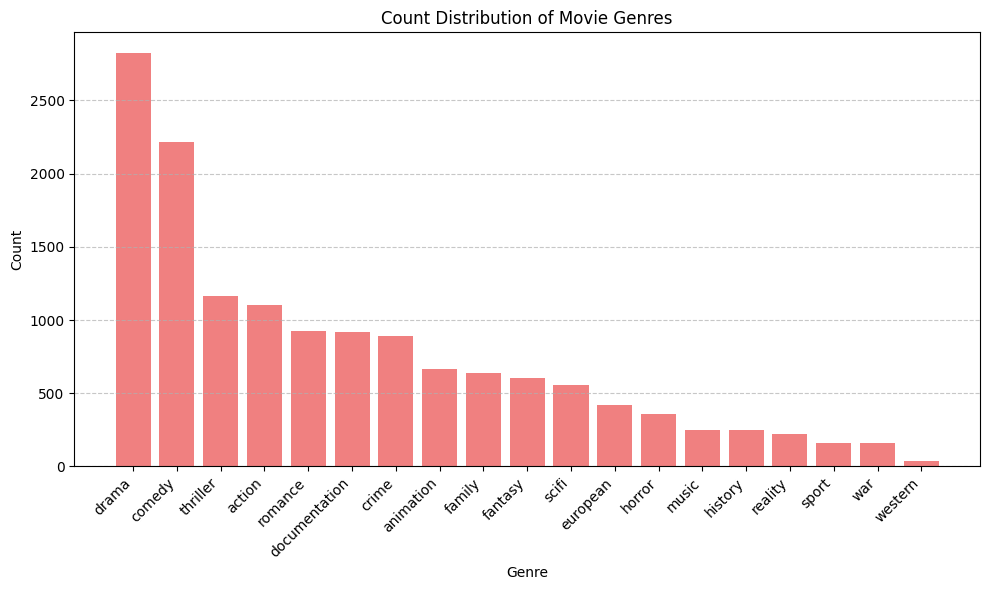

In [15]:
# Plotting the distribution by percentage
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
print("Genre distribution plot by Count")

Most Common Genre Combinations

In [16]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
genre_set_counts.head(20)

genres
[comedy]                            462
[documentation]                     325
[drama]                             308
[drama, comedy]                     238
[drama, comedy, romance]            201
[drama, romance]                    158
[comedy, romance]                   115
[reality]                           108
[drama, crime, thriller]            107
[comedy, documentation]             105
[crime, documentation]               85
[drama, thriller]                    81
[music, documentation]               69
[drama, crime, thriller, action]     65
[drama, crime]                       61
[animation]                          54
[]                                   50
[drama, thriller, horror]            43
[thriller, horror]                   42
[animation, family]                  40
Name: count, dtype: int64

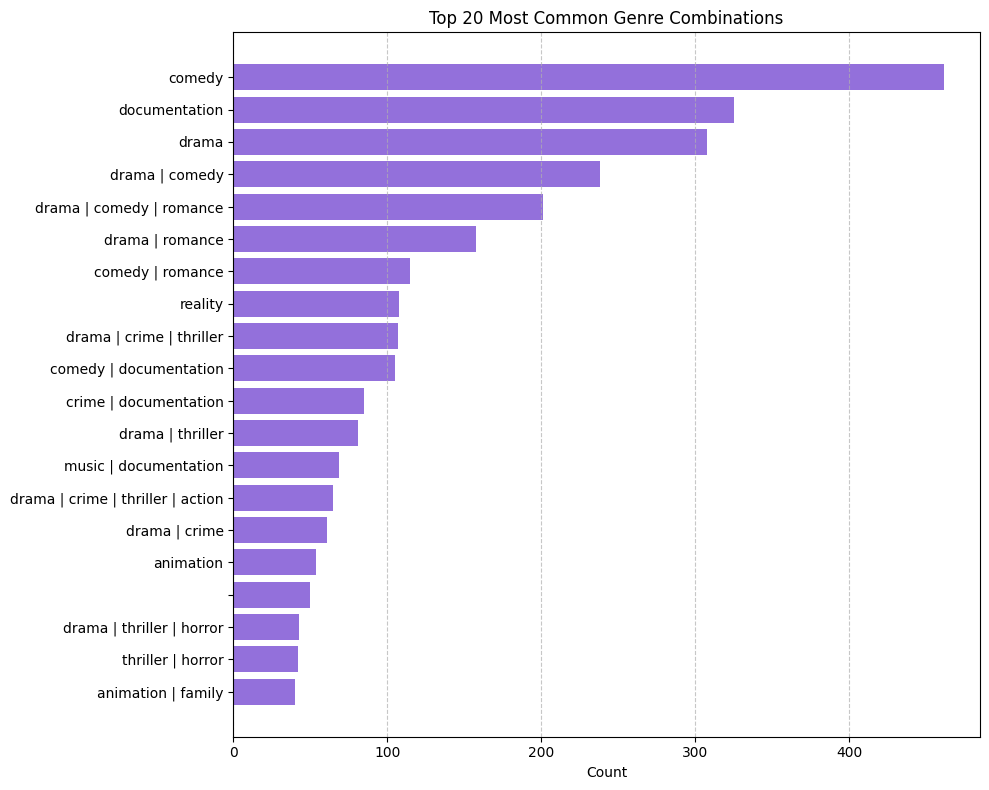

In [17]:
top_20_genres = genre_set_counts.head(20)
labels = [' | '.join(g) for g in top_20_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_20_genres.values, color='mediumpurple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Genre Combinations (With more than one genre)

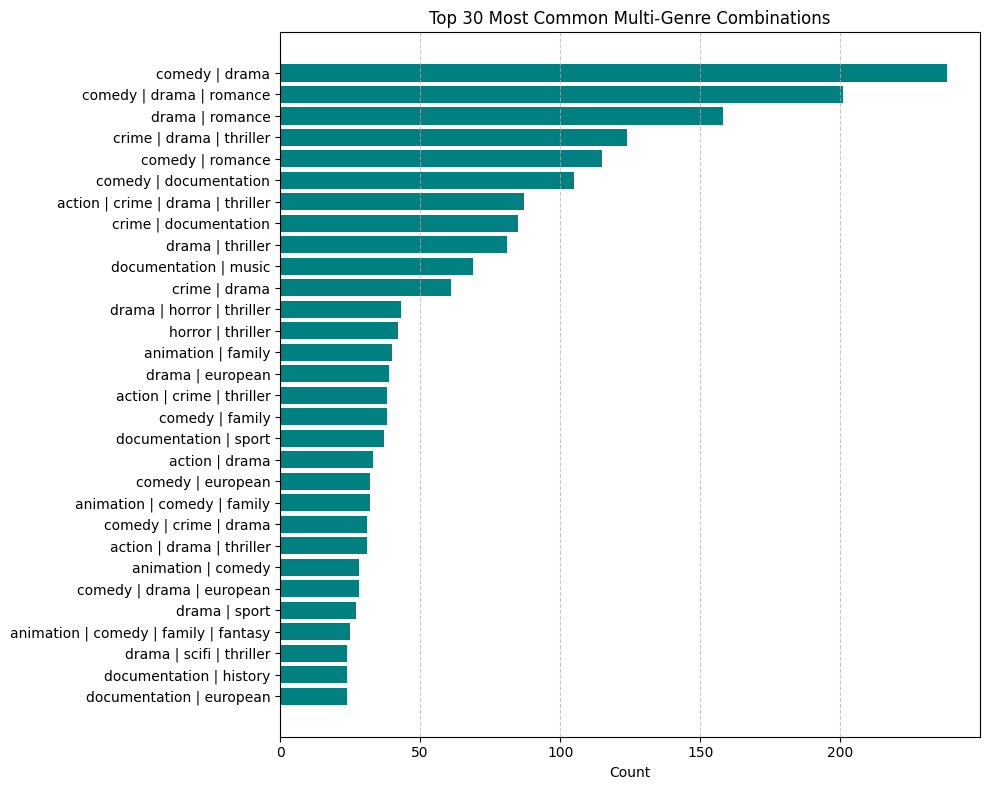

In [18]:
genre_sets = df['genres'].apply(lambda x: frozenset(x))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) > 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(30)
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Top 30 Most Common Multi-Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Single Genre (With more than one genre)

In [19]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) <= 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(20)
top_multi_genres

genres
[comedy]           462
[documentation]    325
[drama]            308
[reality]          108
[animation]         54
[]                  50
[thriller]          27
[family]            16
[horror]            15
[action]            14
[music]              9
[romance]            7
[crime]              6
[fantasy]            5
[war]                4
[scifi]              4
[western]            1
Name: count, dtype: int64

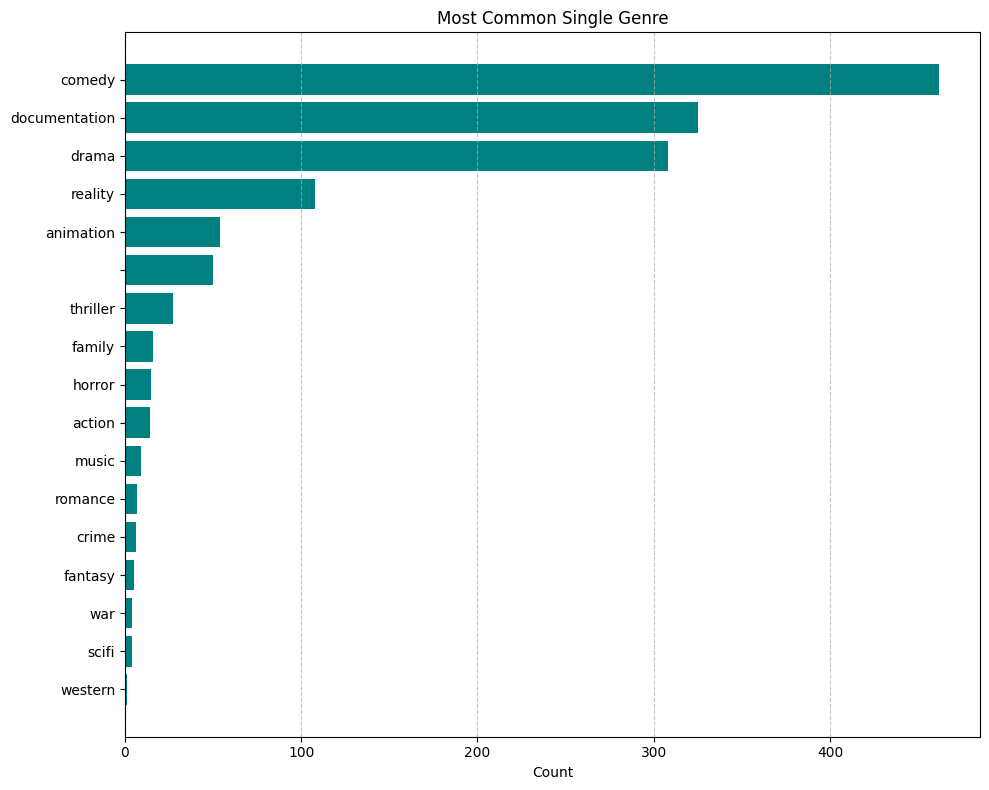

In [20]:
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Most Common Single Genre')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

What is the most popular single-labeled genre based on imdb score

In [21]:
# Explode genres to handle multi-genre entries
genre_expanded_df = df.copy()
genre_expanded_df = genre_expanded_df.explode('genres')

# Group by individual genre and compute average IMDb score and count
genre_stats = genre_expanded_df.groupby('genres')['imdb_score'].agg(['mean', 'count'])

# Round the average IMDb score
genre_stats['mean'] = genre_stats['mean'].round(1)
genre_stats = genre_stats.reset_index()
genre_stats.columns = ['genre', 'imdb_score', 'count']
genre_stats = genre_stats.sort_values(by='imdb_score', ascending=False).reset_index(drop=True)
genre_stats

,genre,imdb_score,count
0,history,7.1,246
1,documentation,7.0,830
2,war,7.0,149
3,sport,6.7,163
4,crime,6.7,868
5,animation,6.7,592
6,drama,6.6,2695
7,western,6.5,38
8,scifi,6.5,529
9,european,6.5,402


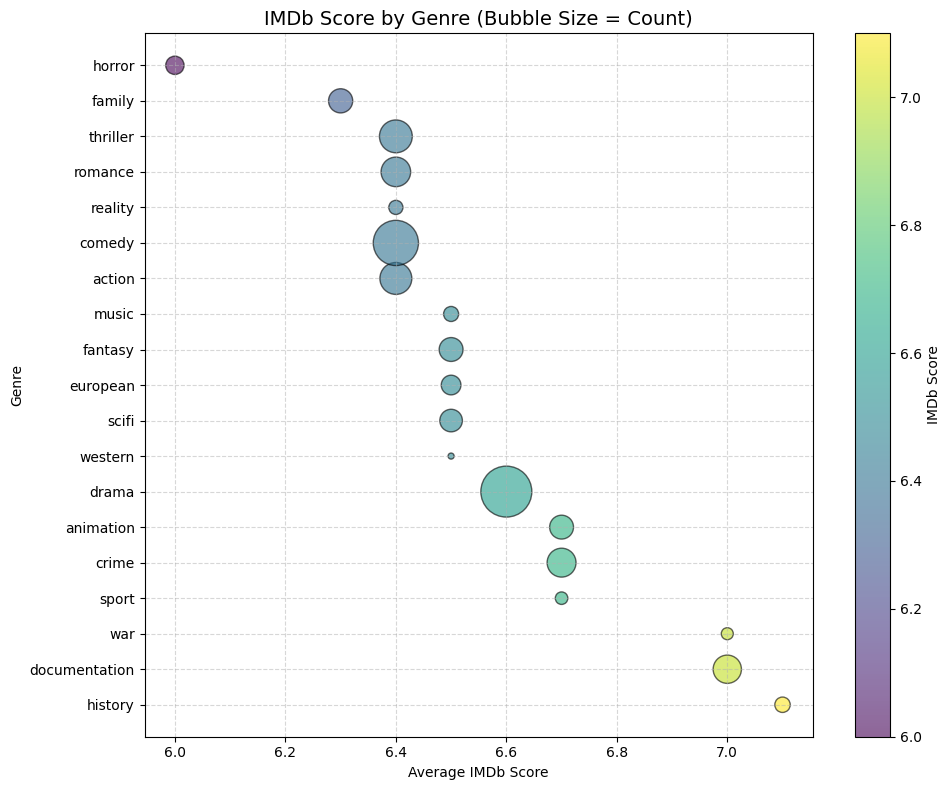

In [22]:
plt.figure(figsize=(10, 8))
plt.scatter(
    genre_stats['imdb_score'], genre_stats['genre'],
    s=genre_stats['count'] / 2,  # bubble size
    alpha=0.6, c=genre_stats['imdb_score'], cmap='viridis', edgecolor='black'
)

plt.title('IMDb Score by Genre (Bubble Size = Count)', fontsize=14)
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.colorbar(label='IMDb Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

What is the most popular multi-labeled genre based on imdb score ?

In [23]:
multi_genre_df = df[df['genres'].apply(lambda x: len(x) > 1)].copy()
multi_genre_df['genre_combo'] = multi_genre_df['genres'].apply(lambda x: tuple(sorted(x)))
grouped = multi_genre_df.groupby('genre_combo')['imdb_score'].agg(['mean', 'count'])
genre_combo_stats = grouped.reset_index()
genre_combo_stats['mean'] = genre_combo_stats['mean'].round(1)
genre_combo_stats.columns = ['genre_combination', 'imdb_score', 'count']
genre_combo_stats = genre_combo_stats.sort_values(by='count', ascending=False).reset_index(drop=True)
genre_combo_stats.head(20)

,genre_combination,imdb_score,count
0,"(comedy, drama)",6.8,221
1,"(comedy, drama, romance)",6.4,199
2,"(drama, romance)",6.5,152
3,"(crime, drama, thriller)",6.9,120
4,"(comedy, romance)",5.9,112
5,"(comedy, documentation)",6.7,104
6,"(action, crime, drama, thriller)",6.4,86
7,"(crime, documentation)",6.9,83
8,"(drama, thriller)",6.3,72
9,"(documentation, music)",7.0,61


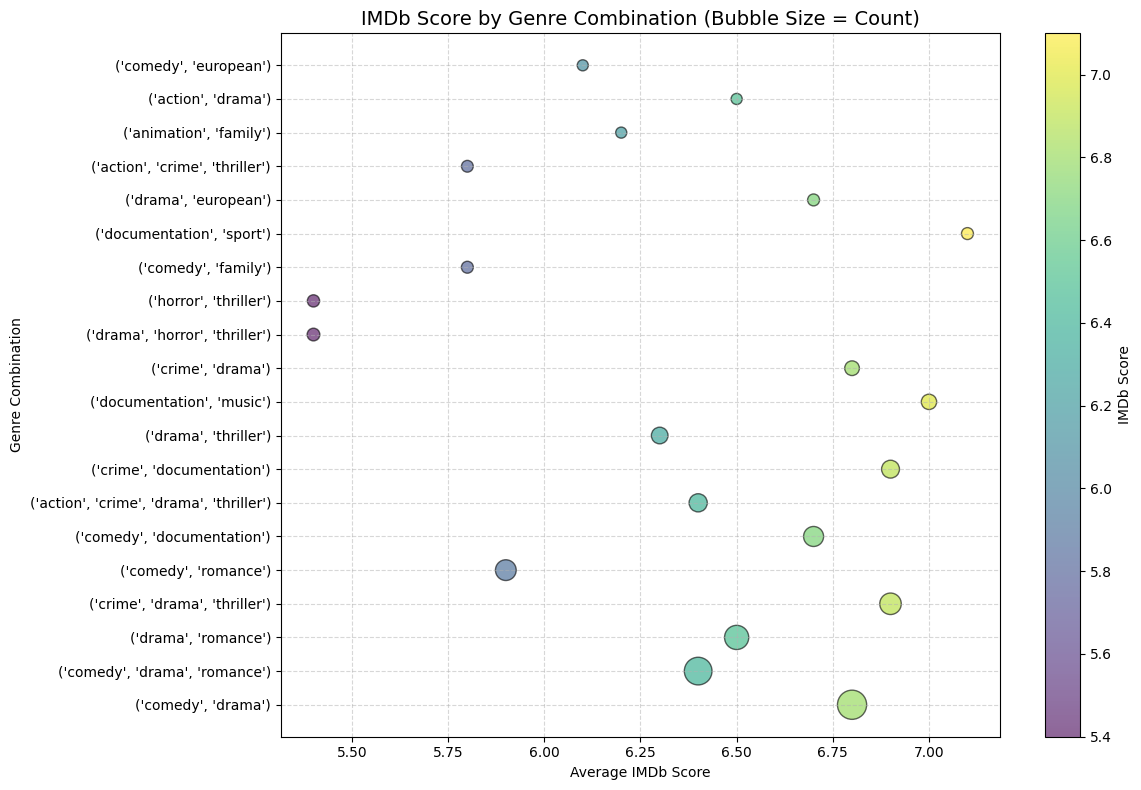

In [24]:
# Use top 15 combinations only for readability
top_combos = genre_combo_stats.head(20)

plt.figure(figsize=(12, 8))
plt.scatter(
    top_combos['imdb_score'],
    top_combos['genre_combination'].astype(str),  # Convert tuples to strings for labels
    s=top_combos['count'] * 2,  # Bubble size
    c=top_combos['imdb_score'],  # Color by IMDb score
    cmap='viridis',
    alpha=0.6,
    edgecolors='black'
)

plt.title('IMDb Score by Genre Combination (Bubble Size = Count)', fontsize=14)
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre Combination')
plt.colorbar(label='IMDb Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Check 5 random descriptions with empty genres


In [25]:
empty_genre_rows = df[df['genres'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
for desc in empty_genre_rows['plot'].dropna().sample(5):
    print(desc)
    print('-' * 100)

The stars of "Bling Empire" discuss the show's success and play bling-themed games, then comic Joel Kim Booster makes his case for joining the cast.
----------------------------------------------------------------------------------------------------
The comedic dream team from "The Upshaws" discuss the hit series, share some anecdotes from their own upbringings and play a little swag-centric game.
----------------------------------------------------------------------------------------------------
Osuofia return to his Nigerian village with a new British wife, the scheming fiancee of his dead brother.
----------------------------------------------------------------------------------------------------
A reality series introducing Korean alcohol and food culture by Culinary Researcher Baek Jong Won. Drinks keep the conversation flowing as culinary star Baek Jong Won and celebrity guests talk life, food and booze over intoxicating meals.
----------------------------------------------------